# 1. Introduction

In this Jupyter notebook, various aspects that are necessary for statistical research will be discussed. The basis of this assignment is the data arising from a study into the use of a FitBit. This document is made up of different components in which different statistical methods have been implemented on this data. 

The structure is as follows:
1. Introduction
2. Data cleaning
3. Exploratory data analysis I
4. Exploratory data analysis II
5. Evaluation
6. Conclusion

# 2. Data cleaning

In [176]:
import seaborn as sns
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression #remember, this is linear regression model from sk-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
steps = pd.read_csv("steps.csv", delimiter=";") #reading in csv with specified delimiter

steps

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,925,NaN,4571.0,10471.0,5899.0,15295.0,9178.0,9348.0,12229.0,13767.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
925,926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
926,927,NaN,NaN,NaN,1623.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
927,928,NaN,NaN,14411.0,14364.0,26629.0,13092.0,9266.0,14949.0,43238.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [177]:
survey = pd.read_csv("survey.csv") #reading in csv

survey

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0
...,...,...,...,...,...,...,...,...,...
924,925,Lille,Female,45-54,3,4,Master or doctorate,165.0,59.0
925,926,Lille,Male,<25,3,5,Bachelor,192.0,90.0
926,927,Montpellier,Male,35-44,2,2,Bachelor,181.0,71.0
927,928,Lille,Female,55-64,1,1,High school,172.0,65.0


In [178]:
merged = pd.merge(survey, steps, on="id") #merge two csv files on common 'id'
merged

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,925,Lille,Female,45-54,3,4,Master or doctorate,165.0,59.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
925,926,Lille,Male,<25,3,5,Bachelor,192.0,90.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
926,927,Montpellier,Male,35-44,2,2,Bachelor,181.0,71.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
927,928,Lille,Female,55-64,1,1,High school,172.0,65.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


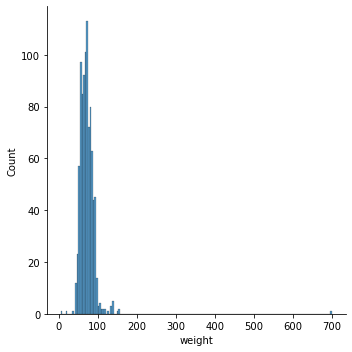

In [179]:
sns.displot(merged['weight'], kde=False) #plot histogram of weight distribution

Results show a normal distribution!
Although there seems to be an unrealistic outlier that should be removed

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


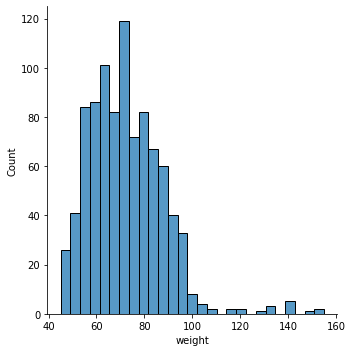

In [180]:
merged['weight'] = merged['weight'].apply(pd.to_numeric, errors='coerce')

def above_200(x):
    if(x > 200.0 or x < 40): # weight under 40 and above 200 kilogram is removed from the dataset
        return float('NaN')
    else: 
        return x
    
merged['weight'] = merged['weight'].apply(above_200)

sns.displot(merged['weight'], kde=False) # show filtered dataset in table and histogram
merged.head()

The new histogram gives a better representation of the dataset with the impossible (very unrealistic) outliers removed

In [181]:
seperate = merged.iloc[:, 9:] # only get tables that contain steps
mean = seperate.mean(axis=1) # avg data horizontally

merged['mean_steps'] = round(mean,2) # round the average AND add to table
merged

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,mean_steps
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10205.52
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5687.42
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN,8301.73
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3633.20
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5312.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,925,Lille,Female,45-54,3,4,Master or doctorate,165.0,59.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6282.13
925,926,Lille,Male,<25,3,5,Bachelor,192.0,90.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4799.88
926,927,Montpellier,Male,35-44,2,2,Bachelor,181.0,71.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10030.33
927,928,Lille,Female,55-64,1,1,High school,172.0,65.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15679.68


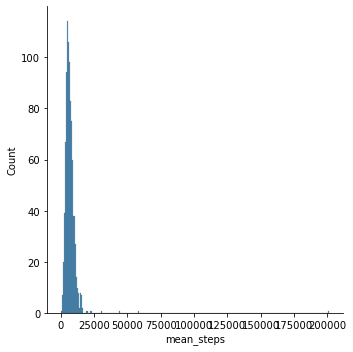

In [182]:
sns.displot(merged['mean_steps'], kde=False) # show distribution of 'avg' column

On the graph it shows there is an unrealistic large outlier that should be removed. (The average of steps per day is 6000 significantly lower than the highest of 200.000) 

In [183]:
merged['mean_steps'].max(axis=0) # show max value

201722.6

In [184]:
merged['mean_steps'] = merged['mean_steps'].apply(pd.to_numeric, errors='coerce')

def above_50k(x):
    if(x > 50000): # remove values higher than 50.000
        return float('NaN')
    else: 
        return x
    
merged['mean_steps'] = merged['mean_steps'].apply(above_50k)

merged

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,mean_steps
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10205.52
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5687.42
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN,8301.73
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3633.20
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5312.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,925,Lille,Female,45-54,3,4,Master or doctorate,165.0,59.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6282.13
925,926,Lille,Male,<25,3,5,Bachelor,192.0,90.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4799.88
926,927,Montpellier,Male,35-44,2,2,Bachelor,181.0,71.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10030.33
927,928,Lille,Female,55-64,1,1,High school,172.0,65.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15679.68


# 3. Exploratory data analysis I

### Graphs of distribution

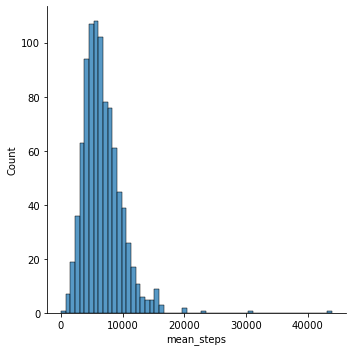

In [185]:
sns.displot(merged['mean_steps'], kde=False)

The graph shows the data follows a normal distribution with some outliers on the right.

C:\Users\matsv\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


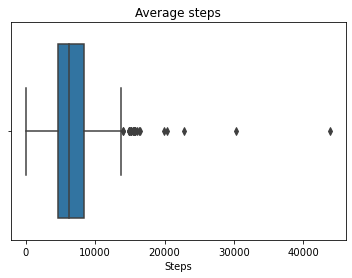

In [186]:
sns.boxplot(merged['mean_steps'])
plt.title('Average steps')
plt.xlabel('Steps')
plt.show()

The boxplot shows that most values are around 6000 which seems to be quite realistic. There seem to be multiple outliers on the right, although they're technically outliers. 20.000 steps a day is definitely not impossible to achieve and therefore should not be left out of the total analysis

### Summary statistics

In [187]:
mean = round(merged['mean_steps'].mean(),2)
mean

6769.95

In [188]:
median = round(merged['mean_steps'].median(),2) 
median

6244.86

The result above show that the median is lower than the mean which already implies a level of skewness to the distribution

In [189]:
std = round(merged['mean_steps'].std(),2)
std

3283.39

The standard deviation shows the distribution of the population based on the variable 'avg' (steps).

In [190]:
skew = 3 * (mean - median) / std
skew

0.47976938469082275

Because the outcome of the Pearson's skewness test is not 0 there is a level of skewness. Because it is positive the skewness is centered towards the right side of the distribution. 

### Verbal description

1. Normality: the histogram shows the data follows a normal distribution.
2. Outliers: the boxplot shows multiple outliers on the right side, although these values are high, they are probably not impossible. All values above 50.000 were removed which turned out te be 1 value of '201722.67'. This number seemed unreasonable high.
3. Skewness: the outcome of the Pearson skewness shows the data is positively skewed.
4. Mean: the mean shows a reasonable number which aligns with it being realistic
5. Median: the median is lower than the mean which corresponds to the outcome of the skewness test

### Relation between two categorical values

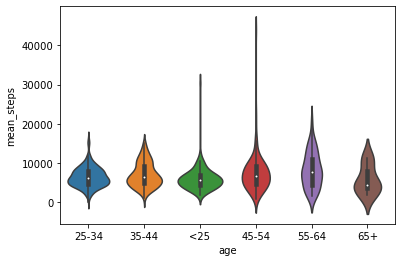

In [191]:
ax = sns.violinplot(x="age", y="mean_steps", data=merged)

Besides from showing the statistics of mean steps per group it also takes into account the entire distribution of it. 
1. 25-34: Although this group shows a (close to) normal distribution there seems to be a characteristic of a bimodal of at least skewed view in the violion chart. An explanation for this could be a difference between the 'gender' within the group for example. The median is centered between the IQR meaning no level of skew. Furthermore, the (standard)devation seems to be reasonable.
2. 35-44:  This group shows a bimodal distribution which could be explained by multiple different factors (for example gender). The IQR is larger than the group of 25-34 which can by explained by the bimodal distribution. The median is not centered meanig the data is a little bit skewed.  
3. <25: This group shows a normal distribution which includes several outliers seen above the upper adjacent value. Because the distribution is closely centered it can be said that the (standard)devation is relatively small. This means that most values are surrounded by the median. Futhermore, the median is centered between the third- and first quartile meaning no or low level of skewness
4. 45-54: This group shows a normal distribution which includes several outliers seen above the upper adjacent value. The (standard)devation of this group is larger than the group of <25 which means that the amount of steps are more equally devided between people within the group. Futhermore, the median is centered between the third- and first quartile meaning no or low level of skewness.
5. 55-64: This groups show a normal distribution with a large (standard)deviation. The median is centered between the IQR which is relatively big because of the high (standard)devation 
6. 65+: This group shows a biomodal distribution  with the median on the lower side of IQR which can be explained by the distribution itself and the level of skewness. There are no values above the upper adjacent value which means no outliers. The distribution can be explanined again by multiple factors (for example gender)

The difference between groups show that there is a possible statistical relationship.

C:\Users\matsv\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


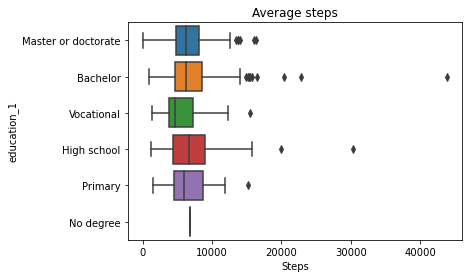

In [192]:
sns.boxplot(merged['mean_steps'],merged['education_1'])
plt.title('Average steps')
plt.xlabel('Steps')
plt.show()

The group with the highest upper adjacent value is seen by the high school group followed by the bachelor group. The median is best centered in the groups of high school, bachelor and master or doctorate. This means that they have no or little skewness. The largest IQR is seen by the high school group meaning that values are spread out further from the central portion of it. The bachelor and master or doctorate group have the most value above the upper adjactent value (outliers). I myself would say that the high school group has the most beautiful boxplot shown by the central placement of the data and the amount of spreading in combination with the higher values. The difference between groups show that there is a possible statistical relationship.

# 4. Exploratory data analysis II

In [193]:
df = merged[['education','height','weight','mean_steps']]

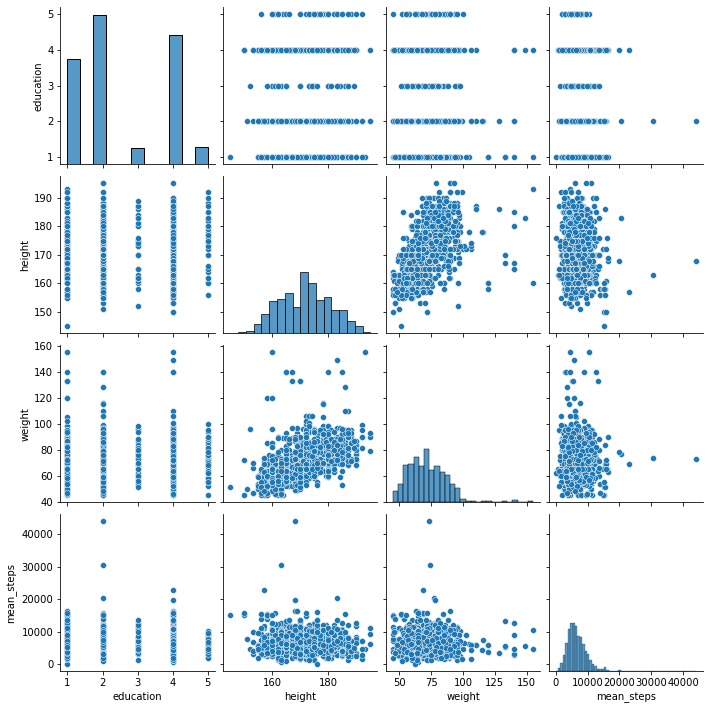

In [194]:
sns.pairplot(df)
plt.show()

The plotted diagrams show no actual correlations beside the correlation between height and weight, which is already obvious. The results from the table below also the only values high enough are height and weight (r = 0.508) 

In [195]:
df.corr()

,education,height,weight,mean_steps
education,1.000000,-0.046343,0.008233,0.013188
height,-0.046343,1.000000,0.508194,-0.089823
weight,0.008233,0.508194,1.000000,-0.055266
mean_steps,0.013188,-0.089823,-0.055266,1.000000


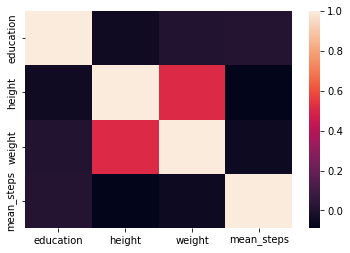

In [196]:
sns.heatmap(df.corr());

In the heatmap above the highest point of correlation is again between height and wait without any other values.

# Predictive model

### Explanation of lineair regression

Lineair regression is simply put a method where one variable is being used to the predict the value of another value. In a graph, lineair regression is mostly seen as a scatterplot with a line going trough it. With a perfect regression there is no RMSE, when the RMSE is high the results put out by the regression may not be accurate.

### Dummy variables

In [275]:
X = merged[['age','gender','education_1','city']]
X = pd.get_dummies(data=X, drop_first=True).fillna(0)

merged['age']

0      25-34
1      35-44
2      25-34
3        <25
4      25-34
       ...  
924    45-54
925      <25
926    35-44
927    55-64
928    25-34
Name: age, Length: 929, dtype: object

In [276]:
data.head()

,age_35-44,age_45-54,age_55-64,age_65+,age_<25,gender_Male,education_1_High school,education_1_Master or doctorate,education_1_No degree,education_1_Primary,education_1_Vocational
0,0,0,0,0,0,1,0,1,0,0,0
1,1,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,1,0,0,0
3,0,0,0,0,1,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [281]:
df = merged[['age','gender','education_1','city','mean_steps']].replace([np.inf, -np.inf], np.nan).dropna(axis=0)

In [282]:
Y = df['mean_steps']
Y

0      10205.52
1       5687.42
2       8301.73
3       3633.20
4       5312.13
         ...   
924     6282.13
925     4799.88
926    10030.33
927    15679.68
928     7584.47
Name: mean_steps, Length: 923, dtype: float64

In [283]:
X = df[['age','gender','education_1','city']]
X

,age,gender,education_1,city
0,25-34,Male,Master or doctorate,Bordeaux
1,35-44,Male,Bachelor,Lille
2,25-34,Male,Master or doctorate,Montpellier
3,<25,Male,Bachelor,Lyon
4,25-34,Female,Bachelor,Montpellier
...,...,...,...,...
924,45-54,Female,Master or doctorate,Lille
925,<25,Male,Bachelor,Lille
926,35-44,Male,Bachelor,Montpellier
927,55-64,Female,High school,Lille


In [284]:
X = pd.get_dummies(data=X, drop_first=True)
X.head()

,age_35-44,age_45-54,age_55-64,age_65+,age_<25,gender_Male,education_1_High school,education_1_Master or doctorate,education_1_No degree,education_1_Primary,education_1_Vocational,city_Lille,city_Lyon,city_Montpellier
0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0,1,0,0,0,0,0,1
3,0,0,0,0,1,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [285]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(553, 14)
(370, 14)
(553,)
(370,)


In [286]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [287]:
print(model.intercept_)

6487.152570070138


In [288]:
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
age_35-44,602.889945
age_45-54,880.001154
age_55-64,2347.697938
age_65+,-548.816612
age_<25,-396.273997
gender_Male,-433.542502
education_1_High school,423.246253
education_1_Master or doctorate,-131.976242
education_1_No degree,-1871.298707
education_1_Primary,-296.769717


In [289]:
predictions = model.predict(X_test)
predictions

array([6578.5657843 , 6048.75525293, 7892.10944005, 6228.48452683,
       6578.5657843 , 8926.26372263, 9359.80622468, 5176.05146493,
       6228.48452683, 6360.46076834, 7050.4363986 , 6355.17632856,
       6314.26802922, 6801.6349802 , 8447.33193408, 5747.18899239,
       8170.22072499, 9058.23996414, 6228.48452683, 7012.10828636,
       6651.64519754, 7962.9106892 , 6182.29178771, 8024.08568156,
       6182.29178771, 6360.46076834, 7012.10828636, 5615.21275088,
       6487.15257007, 7240.46192204, 5615.21275088, 5921.63382651,
       7367.15372377, 7144.08452787, 6933.61122172, 7590.54317951,
       7012.10828636, 6747.81053127, 6228.48452683, 7746.97447247,
       6355.17632856, 7567.33078038, 5657.33607143, 8024.08568156,
       6710.54202581, 6487.15257007, 7590.54317951, 6228.48452683,
       5964.18677175, 6933.61122172, 6314.26802922, 6053.61006802,
       6578.5657843 , 6360.46076834, 6180.73149444, 7458.566938  ,
       6710.54202581, 7746.97447247, 5048.93003851, 7012.10828

C:\Users\matsv\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mean_steps'>

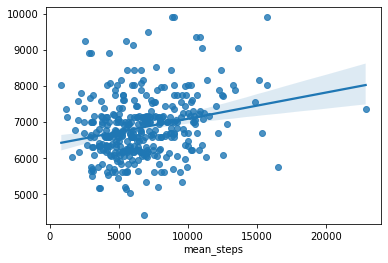

In [290]:
sns.regplot(y_test,predictions)

In [291]:
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:             mean_steps   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     2.254
Date:                Mon, 16 May 2022   Prob (F-statistic):            0.00553
Time:                        21:02:19   Log-Likelihood:                -5286.0
No. Observations:                 553   AIC:                         1.060e+04
Df Residuals:                     538   BIC:                         1.067e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

C:\Users\matsv\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


The predictive power of the model shown is extremely low with a R-squared of 0.044. This means only 4.4% of the mean steps can be predicted by the chosen variabels of age, education and gender. After these results i decided to add the city as well which made the predictive power higher with 1.1% (R-squae\red = 0.055). This aligns with the fact that the correlation model pretty much showed no relation other than the logical weight and height. The RMSE (Root Mean Scare Error) is also very high because the predicted value differs alot from the actual value.

# Conclusion

What can we conclude from all of this? The results show that almost all the predictive values show no direct correlation to the amount of steps. This shows in a regression model with a very low predictive value. This could mean two things. Either, this is the reality and there really is no big difference between the groups or somewhere in the analysis a mistake was made that made it through the total analysis making the result unusable or not trustworthy.